In [2]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('../csvs/dataEerr.csv', index_col=0)
df = df.sort_index()

In [3]:
import rebound
import pandas as pd
import numpy as np
import os
icpath = '/scratch/dtamayo/selectic/data/'

from collections import OrderedDict
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')

from ic import output, initialize, plotsa, integrate, plot
path = '/scratch/dtamayo/selectic/data/'
planets = ['b', 'c', 'd', 'e', 'f', 'g', 'h']
resonances = OrderedDict([(('b','c'),(8,5)),(('c','d'),(5,3)),(('d','e'),(3,2)),(('e','f'),(3,2)),(('f','g'),(4,3)),(('g','h'),(3,2))]) # ordered so we add planets in right sequence
threebodyresonances = OrderedDict([(('b','c','d'),(2,3)),(('c','d','e'),(1,2)),(('d','e','f'),(2,3)),(('e','f','g'),(1,2)),(('f','g','h'),(1,1))])
outputs = initialize(planets, resonances, threebodyresonances)

In [14]:
def elibamp(row):
    print(row.name)
    sa = rebound.SimulationArchive(icpath+row['filename'])
    print(len(sa))
    try:
        imax = int(row['tinstability_index'])
    except:
        imax = sa.Nblob
    print(imax)
    
    emean = []
    erms = []
    libamp = []
    for i in np.arange(0,imax,100)[:-1]:
        outputs = initialize(planets, resonances, threebodyresonances)
        for j in range(100):
            sim = sa[int(i)+j]
            output(sim,planets,resonances,threebodyresonances,outputs)
        t, e, P, Pratio, phi1, phi2, deltapomega, phi3body = outputs
        emean.append(np.array(e['e']).mean())
        erms.append(np.array(e['e']).std())
        phi = np.array(phi3body[('d', 'e', 'f')])
        la = phi.max()-phi.min()
        phi[phi > 180.] -= 360.
        laoffset = phi.max()-phi.min()
        print(i, la, laoffset)
        libamp.append(min(la, laoffset))
    return emean, erms, libamp

0
50001


/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


39.5213212753 39.5213212753
34.7990652027 34.7990652027
37.4189404032 37.4189404032
32.6766028298 32.6766028298
38.1476505363 38.1476505363
49.1473839865 49.1473839865
43.5092315197 43.5092315197
36.4391184143 36.4391184143
45.2651268346 347.861500176
37.3641128085 37.3641128085
42.9147832142 42.9147832142
33.5512244186 33.5512244186
34.2266061778 34.2266061778
34.4312784032 34.4312784032
39.3118010663 39.3118010663
43.0446556834 351.367724896
46.8779846901 352.115615008
34.4039275028 34.4039275028
30.8540449607 30.8540449607
29.0377692726 29.0377692726
43.6496512136 43.6496512136
35.1413028615 35.1413028615
57.8079882827 354.855356133
37.0521410911 37.0521410911
45.8774918322 45.8774918322
37.6758025338 37.6758025338
41.7040124555 41.7040124555
35.2662047533 35.2662047533
33.7540664302 33.7540664302
39.1612449962 39.1612449962
42.5161221748 42.5161221748
45.5068877915 45.5068877915
40.1470461915 40.1470461915
38.148173896 38.148173896
48.8460923876 358.468671167
38.7833591896 38.78335

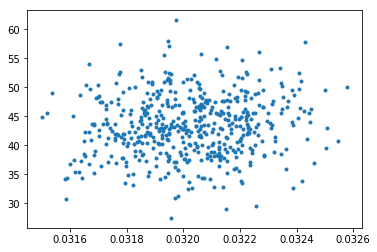

In [4]:
fig, ax = plt.subplots()
emean, erms, libamp = elibamp(df.loc[0])
ax.plot(emean, libamp, '.')

In [ ]:
fig, ax = plt.subplots()
ax.plot(erms, libamp, '.')

125
5001


/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


1.24021227983 1.24021227983
1.28155229832 1.28155229832
1.1899778051 1.1899778051
1.4779704826 1.4779704826
1.45102168482 1.45102168482
1.39273326971 1.39273326971
1.52291810564 1.52291810564
1.32554986619 1.32554986619
1.36678341826 1.36678341826
1.65423456761 1.65423456761
1.24684543145 1.24684543145
1.43940287062 1.43940287062
1.24736888321 1.24736888321
1.05995416975 1.05995416975
1.15322827919 1.15322827919
1.09135620249 1.09135620249
1.28265526334 1.28265526334
1.09220763213 1.09220763213
1.26230763149 1.26230763149
1.43498765643 1.43498765643
1.14284833717 1.14284833717
1.67404306481 1.67404306481
1.55463820296 1.55463820296
1.50914822352 1.50914822352
1.49930429021 1.49930429021
1.36797453004 1.36797453004
1.27481657634 1.27481657634
1.52972100486 1.52972100486
1.44271511788 1.44271511788
1.59221909945 1.59221909945
1.29258726064 1.29258726064
1.31085062975 1.31085062975
1.21217210558 1.21217210558
1.32069111799 1.32069111799
1.19686841327 1.19686841327
1.21713554223 1.21713554

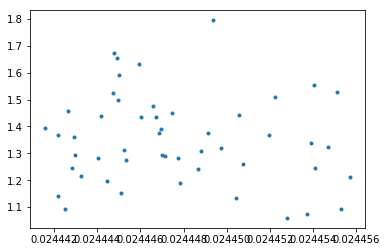

In [28]:
fig, ax = plt.subplots()
emean, erms, libamp = elibamp(df.loc[125])
ax.plot(emean, libamp, '.')

In [23]:
df.loc[125]

K                                                103.15
mag                                          0.00148796
filename              IC125K1.0315e+02mag1.4880e-03.bin
tmax                                              5e+06
tinstability                                      5e+06
Eerr1                                       2.04573e-08
Eerrf                                        9.3309e-08
tinstability_index                                  NaN
Name: 125, dtype: object

In [8]:
print(list(range(0,3164,100)))

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100]


221
5001
3164


/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


0 342.202445541 357.936412805
100 326.626476679 356.990362026
200 302.803311856 359.059220385
300 335.617544639 353.543474029
400 329.539249554 357.677662537
500 343.028796462 358.934415001
600 334.674372457 358.525433797
700 335.290278934 358.707014979
800 325.945505195 355.386137605
900 349.769842152 357.732976239
1000 356.223051427 351.930215376
1100 340.689117078 357.214793926
1200 334.542268997 355.611528914
1300 351.170241965 355.458355174
1400 347.353079367 354.890028975
1500 353.707446034 347.43537896
1600 339.151885218 357.133025888
1700 344.276603942 350.145326748
1800 356.733102794 352.287954103
1900 348.633971555 357.151300252
2000 354.373558813 351.752367029
2100 354.890630255 358.50943437
2200 357.791382429 343.571016512
2300 346.371091563 356.935634765
2400 351.815790299 355.93862602
2500 351.080626338 358.746748783
2600 347.999975214 354.568604522
2700 356.887700321 357.59124463
2800 357.896649924 359.64037298
2900 357.133816128 358.362277119
3000 350.563064665 355.5412

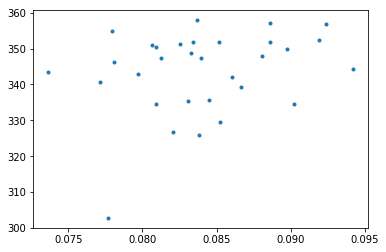

In [15]:
fig, ax = plt.subplots()
emean, erms, libamp = elibamp(df.loc[221])
ax.plot(emean, libamp, '.')

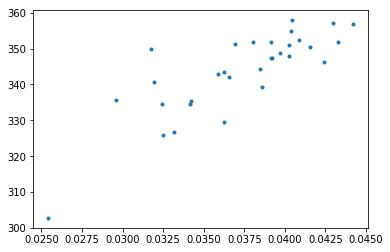

In [18]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(erms, libamp, '.')

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


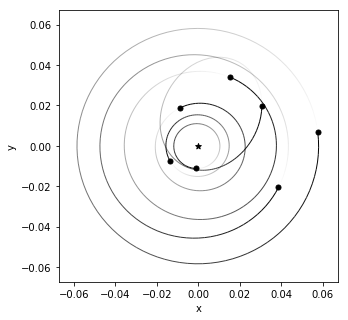

In [7]:
%matplotlib inline
row = df.loc[221]
sa = rebound.SimulationArchive(icpath+row['filename'])
sim = sa[3163]
rebound.OrbitPlot(sim);